In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leggi file
df = pd.read_excel("marzo2022_settembre2025.xlsx", sheet_name="dati pedoni orari")

# Combina data + ora in un'unica colonna datetime
df["datetime"] = pd.to_datetime(df["data"].astype(str) + " " + df["ora"].astype(str))

# Rimuovi le colonne originali
df = df.drop(columns=["data", "ora"])

# Controlla il risultato
df.head()

df

,telecamera,entra,uscita,datetime
0,Arcoribellino,1,2,2022-03-01 00:00:00
1,Arcoribellino,1,0,2022-03-01 01:00:00
2,Arcoribellino,0,0,2022-03-01 02:00:00
3,Arcoribellino,0,0,2022-03-01 03:00:00
4,Arcoribellino,0,0,2022-03-01 04:00:00
...,...,...,...,...
77764,Piazzarocca Uscita,0,9,2025-09-30 20:00:00
77765,Piazzarocca Uscita,0,1,2025-09-30 21:00:00
77766,Piazzarocca Uscita,0,4,2025-09-30 22:00:00
77767,Piazzarocca Uscita,0,0,2025-09-30 23:00:00


In [232]:
# Mostra tutti i nomi unici delle telecamere
telecamere = df["telecamera"].unique()
print(telecamere)


['Arcoribellino' 'Piazzarocca Ingresso' 'Piazzarocca Uscita']


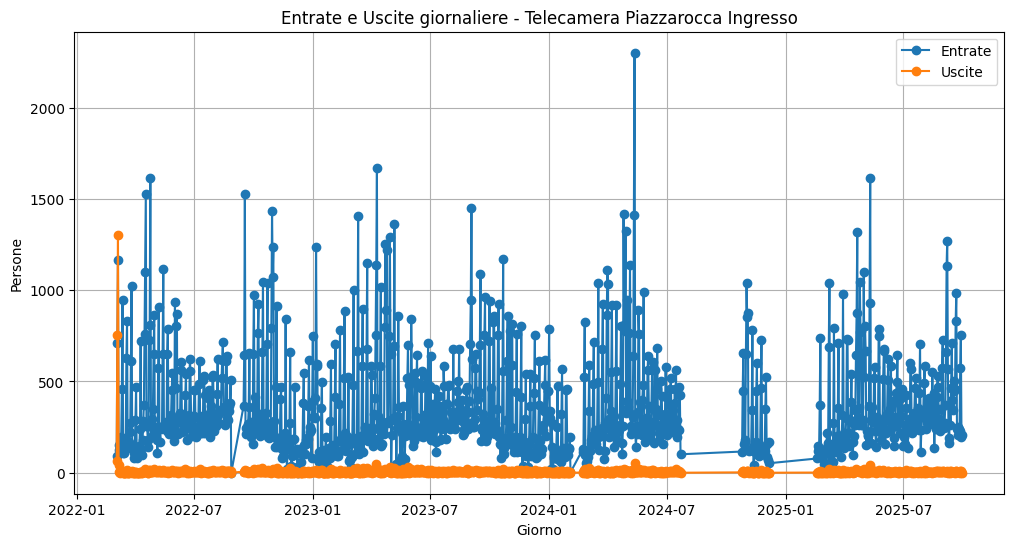

In [233]:
# Scegli telecamera
telecamera_scelta = "Piazzarocca Ingresso"

# Filtra il dataframe per la telecamera scelta
df_cam = df.loc[df["telecamera"] == telecamera_scelta].copy()

# Raggruppa per giorno, sommando entrambe le colonne
df_cam["giorno"] = df_cam["datetime"].dt.date
daily = df_cam.groupby("giorno")[["entra", "uscita"]].sum().reset_index()

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(daily["giorno"], daily["entra"], marker='o', label="Entrate")
plt.plot(daily["giorno"], daily["uscita"], marker='o', label="Uscite")
plt.xlabel("Giorno")
plt.ylabel("Persone")
plt.title(f"Entrate e Uscite giornaliere - Telecamera {telecamera_scelta}")
plt.grid(True)
plt.legend()
plt.show()


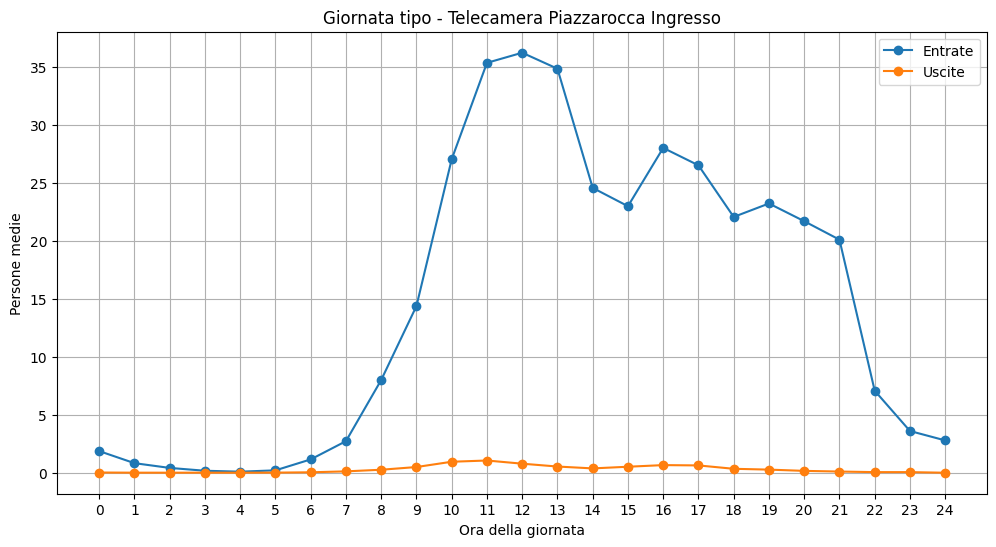

In [234]:
# Filtra il dataframe per la telecamera scelta
df_cam = df[df["telecamera"] == telecamera_scelta]

df_cam = df[df["telecamera"] == telecamera_scelta].copy()  # crea una copia esplicita

# Aggiungi colonna "ora"
df_cam.loc[:, "ora"] = df_cam["datetime"].dt.hour + df_cam["datetime"].dt.minute/60


# Raggruppa per ora e calcola la media delle entrate e delle uscite
daily_type = df_cam.groupby("ora")[["entra", "uscita"]].mean().reset_index()

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(daily_type["ora"], daily_type["entra"], marker='o', label="Entrate")
plt.plot(daily_type["ora"], daily_type["uscita"], marker='o', label="Uscite")
plt.xlabel("Ora della giornata")
plt.ylabel("Persone medie")
plt.title(f"Giornata tipo - Telecamera {telecamera_scelta}")
plt.xticks(range(0,25))  # mostra tutte le ore
plt.grid(True)
plt.legend()
plt.show()


/tmp/ipykernel_9097/1084636201.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Tipo", y="Persone", data=daily_long, palette=["skyblue", "lightgreen"])


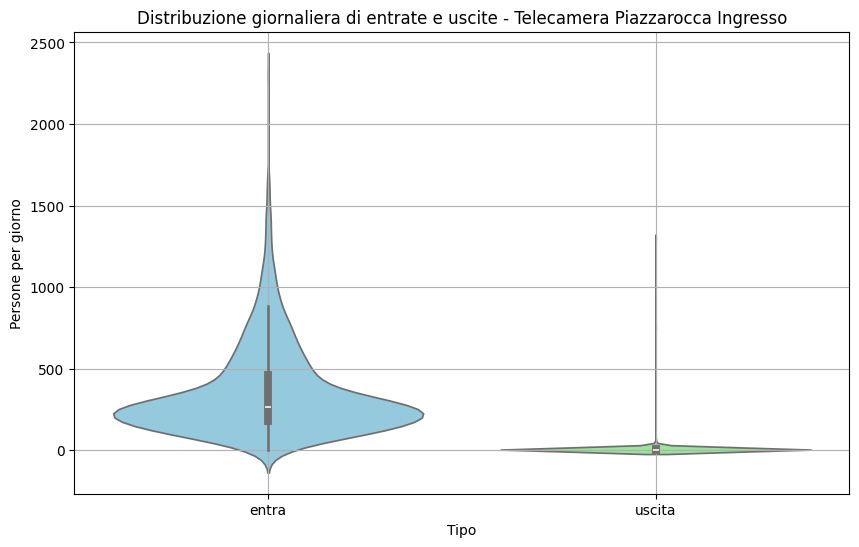

In [235]:
# Raggruppa per giorno sommando entrate e uscite
df_cam["giorno"] = df_cam["datetime"].dt.date
daily = df_cam.groupby("giorno")[["entra", "uscita"]].sum().reset_index()

# Trasforma il dataframe in formato lungo per Seaborn
daily_long = daily.melt(id_vars="giorno", value_vars=["entra", "uscita"],
                        var_name="Tipo", value_name="Persone")

# Grafico a violini
plt.figure(figsize=(10,6))
sns.violinplot(x="Tipo", y="Persone", data=daily_long, palette=["skyblue", "lightgreen"])
plt.title(f"Distribuzione giornaliera di entrate e uscite - Telecamera {telecamera_scelta}")
plt.ylabel("Persone per giorno")
plt.xlabel("Tipo")
plt.grid(True)
plt.show()


In [236]:
# Filtra telecamera
df_cam = df.loc[df["telecamera"] == telecamera_scelta].copy()

# Raggruppa per giorno e somma entrate + uscite
df_cam["giorno"] = df_cam["datetime"].dt.date
daily_totale = df_cam.groupby("giorno")[["entra", "uscita"]].sum()
daily_totale["totale"] = daily_totale["entra"] + daily_totale["uscita"]

# Ordina in base al totale e prendi le prime 30 giornate
special = daily_totale.sort_values("totale", ascending=False).head(70).reset_index()

# ----------------------------
# Aggiungi colonna bool
# ----------------------------
# Crea insieme dei top30 giorni
special_set = set(special["giorno"])

# Colonna booleana: True se il giorno è nei top30, altrimenti False
df_cam["Special"] = df_cam["giorno"].apply(lambda x: x in special_set)

df_cam


,telecamera,entra,uscita,datetime,giorno,Special
744,Piazzarocca Ingresso,17,8,2022-03-04 17:00:00,2022-03-04,False
745,Piazzarocca Ingresso,13,7,2022-03-04 18:00:00,2022-03-04,False
746,Piazzarocca Ingresso,29,4,2022-03-04 19:00:00,2022-03-04,False
747,Piazzarocca Ingresso,19,10,2022-03-04 20:00:00,2022-03-04,False
748,Piazzarocca Ingresso,9,21,2022-03-04 21:00:00,2022-03-04,False
...,...,...,...,...,...,...
77044,Piazzarocca Ingresso,13,0,2025-09-30 20:00:00,2025-09-30,False
77045,Piazzarocca Ingresso,6,0,2025-09-30 21:00:00,2025-09-30,False
77046,Piazzarocca Ingresso,1,0,2025-09-30 22:00:00,2025-09-30,False
77047,Piazzarocca Ingresso,0,0,2025-09-30 23:00:00,2025-09-30,False


MSE: 16616.91
R2: 0.81
MAE: 82.50


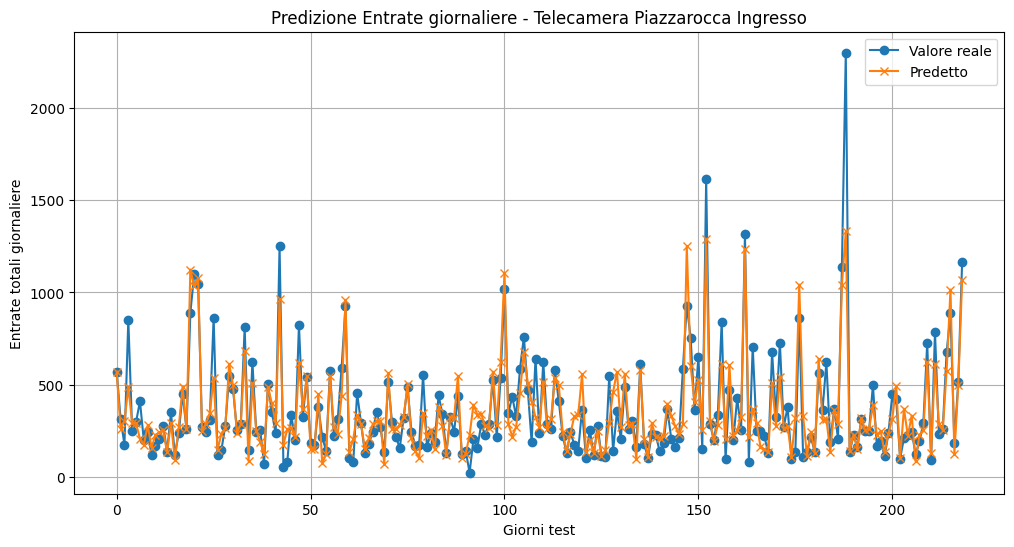

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # <-- aggiunto MAE

# ----------------------------
# 1️⃣ Raggruppa per giorno
# ----------------------------
df_cam["giorno"] = df_cam["datetime"].dt.date
daily = df_cam.groupby("giorno")[["entra", "Special"]].agg({
    "entra": "sum",
    "Special": "max"  # se almeno un'ora è top30, consideriamo il giorno speciale
}).reset_index()
daily["giorno"] = pd.to_datetime(daily["giorno"])

# Feature temporali giornaliere
daily["giorno_settimana"] = daily["giorno"].dt.weekday
daily["mese"] = daily["giorno"].dt.month
daily["giorno_mese"] = daily["giorno"].dt.day

# Target e feature
y = daily["entra"]
X = daily[["giorno_settimana", "mese", "giorno_mese", "Special"]]

# ----------------------------
# 2️⃣ Split train/test
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3️⃣ Modello Gradient Boosting
# ----------------------------
model = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
)
model.fit(X_train, y_train)

# Predizioni
y_pred = model.predict(X_test)

# ----------------------------
# 4️⃣ Valutazione
# ----------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # <-- calcolo MAE

print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")
print(f"MAE: {mae:.2f}")  # <-- stampa MAE

# ----------------------------
# 5️⃣ Visualizza predizioni
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Valore reale", marker='o')
plt.plot(y_pred, label="Predetto", marker='x')
plt.xlabel("Giorni test")
plt.ylabel("Entrate totali giornaliere")
plt.title(f"Predizione Entrate giornaliere - Telecamera {telecamera_scelta}")
plt.legend()
plt.grid(True)
plt.show()


In [238]:

# Giorno inventato
giorno_inventato = pd.to_datetime("2025-12-07")

# Costruisci dataframe giornaliero
df_fake = pd.DataFrame({
    "giorno": [giorno_inventato],
    "giorno_settimana": [giorno_inventato.weekday()],
    "mese": [giorno_inventato.month],
    "giorno_mese": [giorno_inventato.day],
    "Special": [1]  # supponiamo non sia un giorno top30
})

print(df_fake)

# Predizione totale giornaliera
X_fake = df_fake[["giorno_settimana", "mese", "giorno_mese", "Special"]]
y_pred = model.predict(X_fake)

print(f"Predizione totale entrate per {giorno_inventato.date()}: {y_pred[0]:.0f}")


      giorno  giorno_settimana  mese  giorno_mese  Special
0 2025-12-07                 6    12            7        1
Predizione totale entrate per 2025-12-07: 875


In [239]:
import joblib

# Salva il modello in un file .pkl
filename = "pedestrians_model.pkl"
joblib.dump(model, filename)

print(f"Modello salvato in {filename}")


Modello salvato in pedestrians_model.pkl
